([**Return to Week 2 index.**](http://localhost:8890/tree/Desktop/BIOM262/week02#))

# Homework for Week 2

## Table of Contents
[**0. Statistical power and errors in hypothesis testing**](#0.-Statistical power and errors in hypothesis testing)  
[**1. Simple linear regression**](#1.-Simple-linear-regression)  
[**2. Non-linear relationship: particle decay**](#2.-Non-linear-relationships)  
[**3. Non-linear regression**](#3.-Non-linear-regression)  
[**4. Analysis of variance**](#4.-Analysis-of-variance)  
[**5. ANCOVA**](#5.-ANCOVA)

* * *

## 0. Statistical power and errors in hypothesis testing


Visit the app hosted on a ShinyIO hosted by UCSD Biostats<a href = "https://ucsdbiostats.shinyapps.io/Lab_3_F2014/"> here</a> to build your intuition about statistical power, sampling distributions, and hypothesis testing.

(End of Section 0. [Return to top.](#Table-of-Contents))

* * *

## 1. Simple linear regression
**Load the data and look at it.**  This is data on plant growth and tannin content.

* * *

## 1. Simple linear regression

**Load the data and look at it.**  This is data on plant growth and tannin content.

In [4]:
reg.data<-read.csv('shinyexample/tannin.csv')
reg.data

,growth,tannin
1,12,0
2,10,1
3,8,2
4,11,3
5,6,4
6,7,5
7,2,6
8,3,7
9,3,8


**Plot the data**

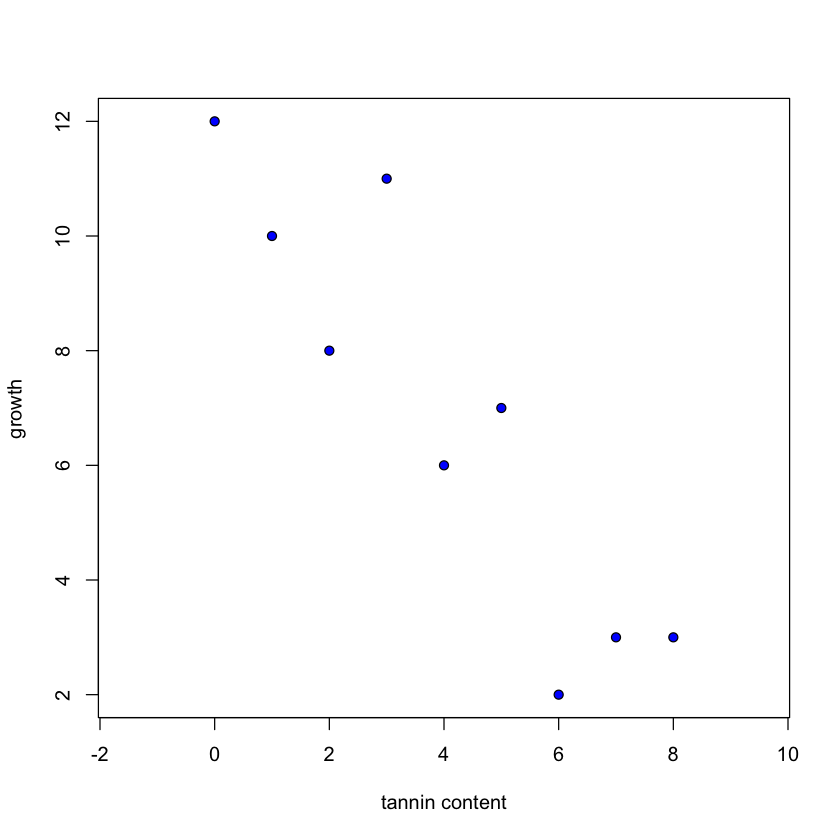

In [5]:
plot(reg.data$tannin,reg.data$growth,pch=21,bg="blue",asp=1,xlab="tannin content",ylab="growth")

**Make a simple linear model** where growth is a linear function of tannin.<br/>
R syntax for models looks like response~explanatory.  lm() is a function to make a linear model.  In this case, the model is a regression line:  $growth_i = a+b*tannin_i$ where <i>a</i> is the intercept and <i>b</i> is the slope and <i>i</i> is a subscript indicating one individual in the dataset.

In [6]:
reg.model=lm(growth~tannin,data=reg.data)
reg.model


Call:
lm(formula = growth ~ tannin, data = reg.data)

Coefficients:
(Intercept)       tannin  
     11.756       -1.217  


**Plot this line**

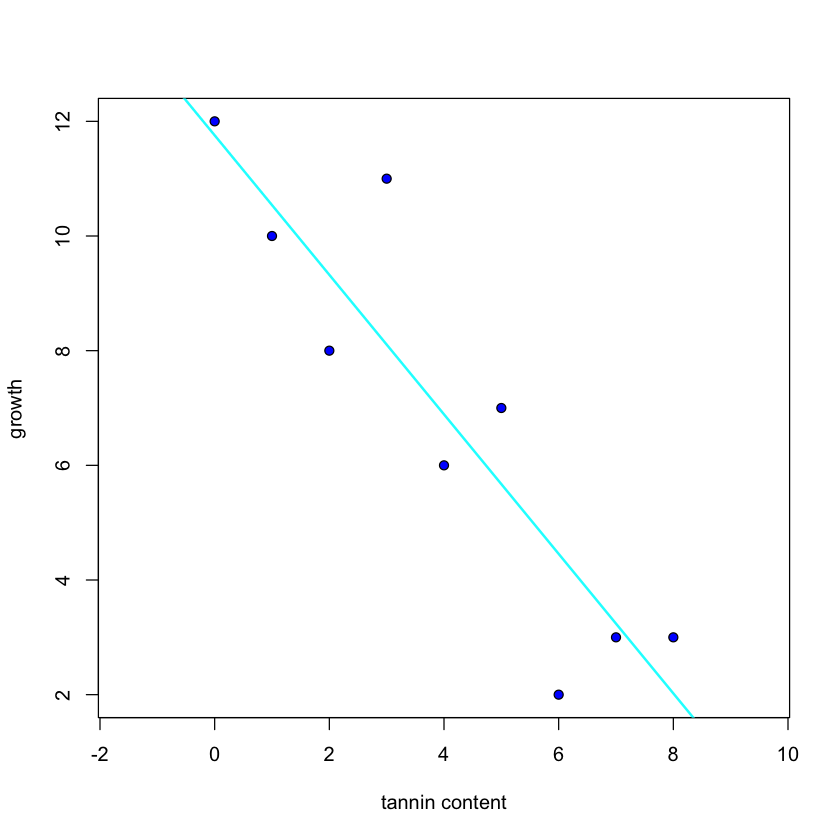

In [7]:
plot(reg.data$tannin,reg.data$growth,pch=21,bg="blue",asp=1,xlab="tannin content",ylab="growth")
abline(lm(growth~tannin,data=reg.data),col="cyan",lwd=2)

Note that the line does not go through all the points.  But it does capture the gist of the relationship between the two variables.

**Store the model**<br/>
In R, "<-" and "=" mean the same thing.  The arrow is literally saying "take this and store it in there."  In this case, take the prediction (model) and store it in the R variable named <i>fitted</i>.

In [8]:
fitted <- predict(lm(growth~tannin,data=reg.data))

**Plot the error (residuals)**

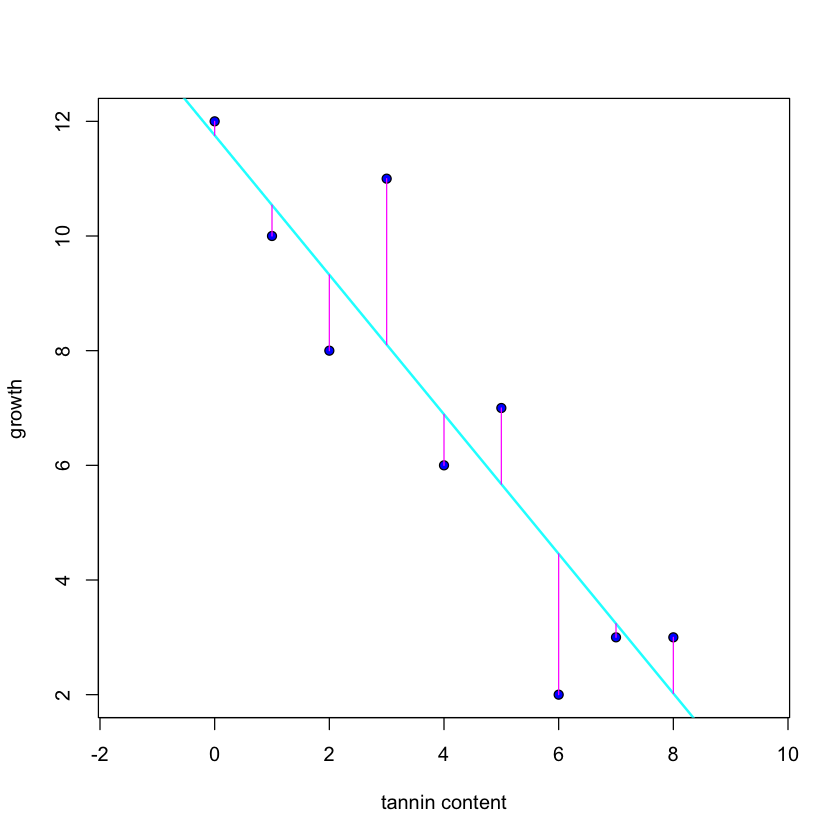

In [9]:
plot(reg.data$tannin,reg.data$growth,pch=21,bg="blue",asp=1,xlab="tannin content",ylab="growth")
abline(lm(growth~tannin,data=reg.data),col="cyan",lwd=2)
for (i in 1:9) {
  lines(c(reg.data$tannin[i],reg.data$tannin[i]),c(reg.data$growth[i],fitted[i]),col="magenta")
}

Residuals show the difference between the prediction (the line here) and the actual values.  Notice that the residuals are vertical. This is because we are trying to predict the response variable (which is on the y-axis) given that we know the values of the explanatory variable ( on the x-axis).

**Plot square residuals**<br/>
Why is this line the "best" line?  It is best in a very specific sense.  It minimizes the sum of the squared residuals.  This is called a <i>least squares fit</i>.  In other words the regression line minimizes the quantity:
$$\sum_{i=1}^{i=n}(y_i-\hat{y}_i)^2$$
where $y_i$ is the actual response value and $\hat{y}_i$ is the predicted value. <br/>
Least squares fitting is a very common criterion for fitting a model to data.

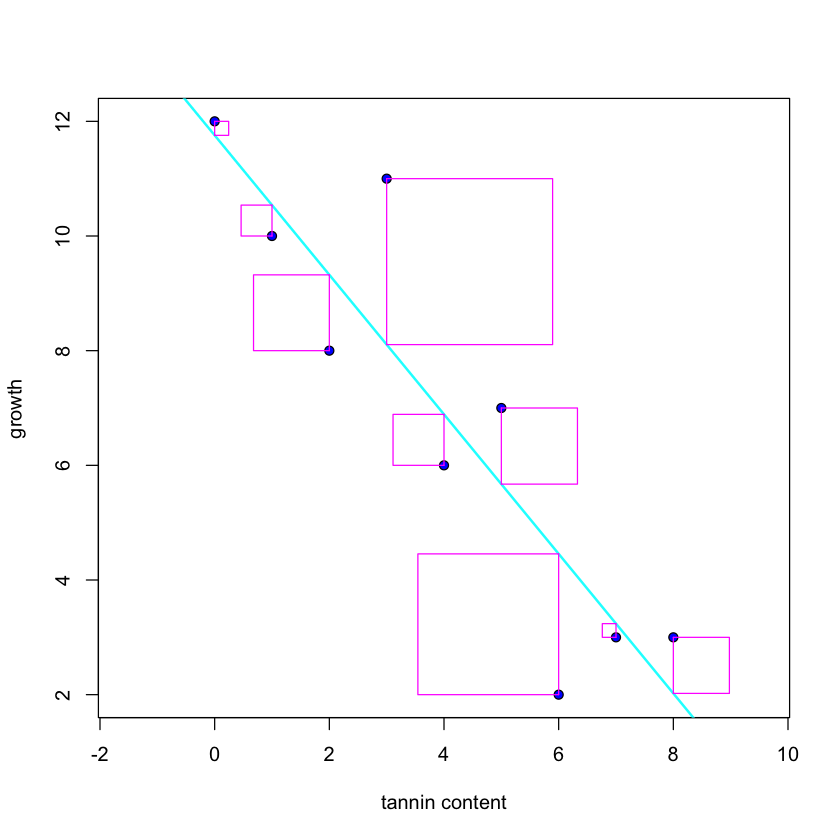

In [11]:
plot(reg.data$tannin,reg.data$growth,pch=21,bg="blue",asp=1,xlab="tannin content",ylab="growth")
abline(lm(growth~tannin,data=reg.data),col="cyan",lwd=2)
for (i in 1:9) {
  lines(c(reg.data$tannin[i],reg.data$tannin[i]),c(reg.data$growth[i],fitted[i]),col="magenta")
res=abs(reg.data$growth[i]-fitted[i])
    if (reg.data$growth[i]<fitted[i]) {#then square goes to left
    lines(c(reg.data$tannin[i],reg.data$tannin[i]-res,reg.data$tannin[i]-res,reg.data$tannin[i]),c(reg.data$growth[i],reg.data$growth[i],fitted[i],fitted[i]),col="magenta")
    }
    else {#then square goes to left
    lines(c(reg.data$tannin[i],reg.data$tannin[i]+res,reg.data$tannin[i]+res,reg.data$tannin[i]),c(reg.data$growth[i],reg.data$growth[i],fitted[i],fitted[i]),col="magenta")
    }
    }

**Estimating the line**<br/>
This code shows the squared residuals for different slopes.  You can see it is a quadratic function concave downwards which means it has a single minimum (if you were to use summed absolute residuals instead of summed squared residuals you would not necessarily have a unique minimum).  

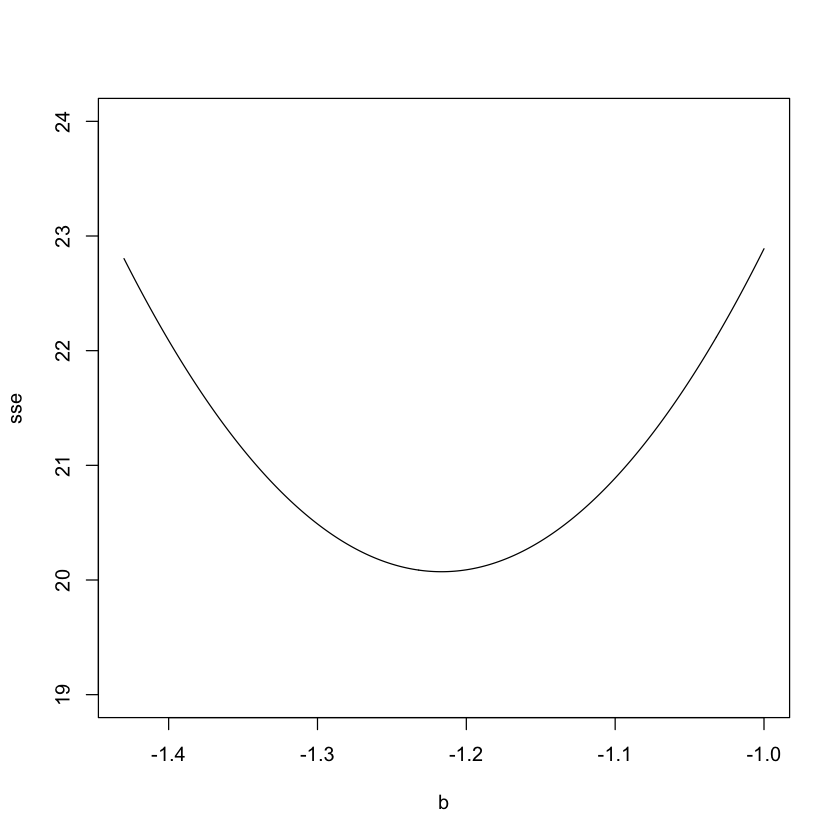

In [13]:
b <-  seq(-1.43,-1,0.002)
sse <- numeric(length(b))
for (i in 1:length(b)) {
  a <- mean(reg.data$growth)-b[i]*mean(reg.data$tannin)
  residual <- reg.data$growth - a - b[i]*reg.data$tannin
  sse[i] <- sum(residual^2)
}
mlval=b[which(sse==min(sse))]
plot(b,sse,type="l",ylim=c(19,24))


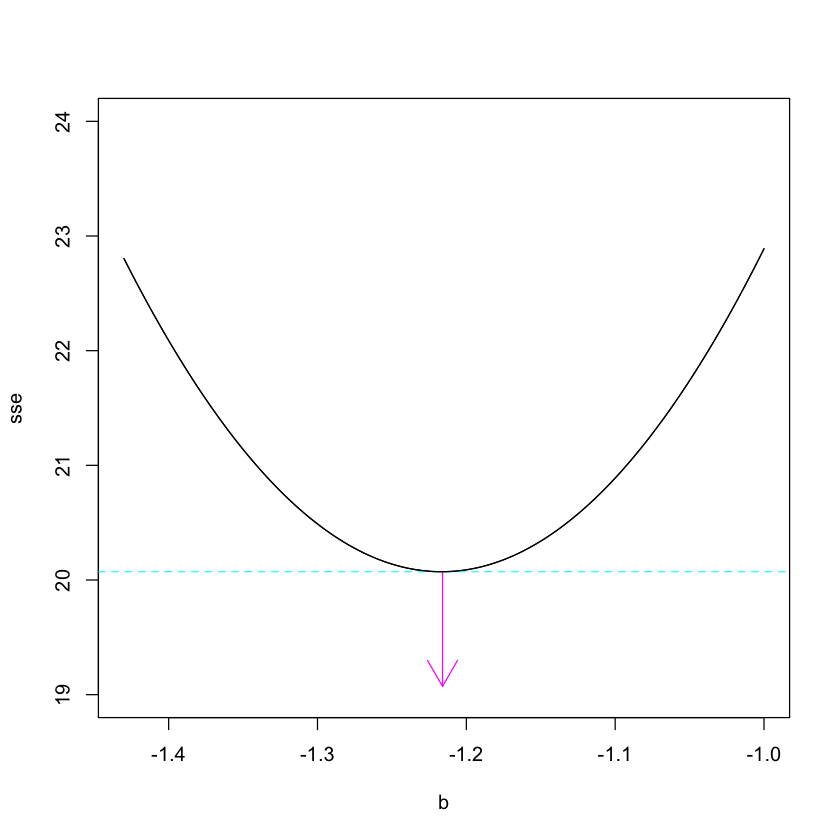

In [14]:
b <-  seq(-1.43,-1,0.002)
sse <- numeric(length(b))
for (i in 1:length(b)) {
  a <- mean(reg.data$growth)-b[i]*mean(reg.data$tannin)
  residual <- reg.data$growth - a - b[i]*reg.data$tannin
  sse[i] <- sum(residual^2)
}
mlval=b[which(sse==min(sse))]
plot(b,sse,type="l",ylim=c(19,24))
arrows(mlval,min(sse),mlval,min(sse)-1,col="magenta")
abline(h=min(sse),col="cyan",lty=2)
lines(b,sse)

**Sums of squares**<br/>
The response value $y_i$ can be broken into three parts.  One part is the mean response ($\bar{y})$.  One part is explained by the model $(\hat{y}_i-\bar{y})$.  The other part is the residual, or unexplained part.

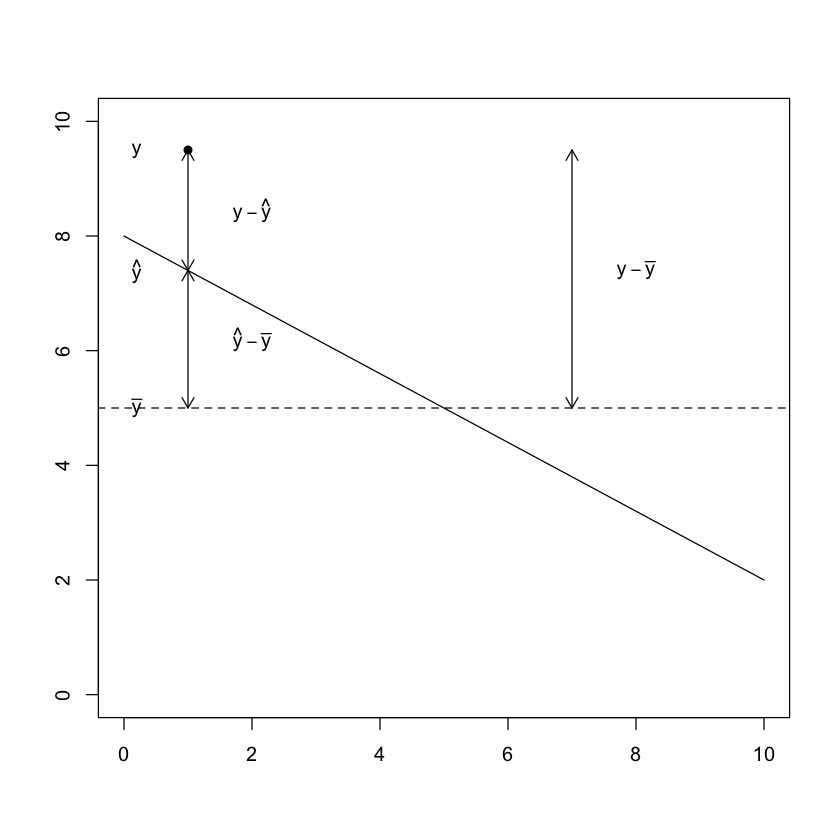

In [15]:
plot(c(0,10),c(0,10),xlab="",ylab="",type="n")
abline(h=5,lty=2)
lines(c(0,10),c(8,2))
text(2,6.2,expression(hat(y) - bar(y)))
text(2,8.45,expression(y - hat(y)))
arrows(7,5,7,9.5,code=3,length=0.1)
arrows(1,5,1,7.4,code=3,length=0.1)
arrows(1,9.5,1,7.4,code=3,length=0.1)
points(1,9.5,pch=16)
text(8,7.4,expression(y - bar(y)))
text(0.2,5,expression(bar(y)))
text(.2,7.4,expression(hat(y)))
text(.2,9.5,"y")

**Regression model**<br/>
R can do hypothesis tests on the slope and intercept to see if they are significantly different from zero. What would it mean if the slope were zero?<br/><br/>
One important number to notice in the output below is $R^2$, the <a href = "https://en.wikipedia.org/wiki/Coefficient_of_determination">Coefficient of determination</a>.  This is the fraction of the total variation in the response variable that is explained by variation in the explanatory variable.  This ranges between 0 and 1.  If it is zero, then variation in the explanatory variable doesn't explain any of the variation in the response variable - not a very good model.  If it is 1, then variation in the response variable is perfectly explained by variation in the explanatory variable - a great model!

In [16]:
model <- lm(growth~tannin,data=reg.data)
summary(model)
#summary.aov(model)


Call:
lm(formula = growth ~ tannin, data = reg.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4556 -0.8889 -0.2389  0.9778  2.8944 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.7556     1.0408  11.295 9.54e-06 ***
tannin       -1.2167     0.2186  -5.565 0.000846 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.693 on 7 degrees of freedom
Multiple R-squared:  0.8157,	Adjusted R-squared:  0.7893 
F-statistic: 30.97 on 1 and 7 DF,  p-value: 0.0008461


(End of Section 1. [Return to top.](#Table-of-Contents))

* * *

## 2. Non-linear relationships
**Particle decay**

In [ ]:
decay<-read.csv('shinyexample/decay.csv')
decay

**Plot the data**

In [ ]:
plot(decay$time,decay$amount,pch=21,col="blue",bg="cyan")

**Linear fit**

In [ ]:
plot(decay$time,decay$amount,pch=21,col="blue",bg="cyan")
abline(lm(amount~time,data=decay),col="magenta")
linmodel=lm(amount~time,data=decay)
summary(lm(amount~time,data=decay))

The linear fit is okay, but it really looks like the data itself doesn't follow a line.

**Transform data** to make it more linear<br/>
Instead of using the variable itself, work with a function of the variable (in this case the log of the response variable).

In [17]:
plot(decay$time,log(decay$amount),pch=21,col="blue",bg="magenta")
abline(lm(log(amount)~time,data=decay),col="blue")
model <- lm(log(amount)~time,data=decay)
summary(model)

ERROR: Error in plot(decay$time, log(decay$amount), pch = 21, col = "blue", bg = "magenta"): object 'decay' not found


ERROR: Error in is.data.frame(data): object 'decay' not found


ERROR: Error in is.data.frame(data): object 'decay' not found



Call:
lm(formula = growth ~ tannin, data = reg.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4556 -0.8889 -0.2389  0.9778  2.8944 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.7556     1.0408  11.295 9.54e-06 ***
tannin       -1.2167     0.2186  -5.565 0.000846 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.693 on 7 degrees of freedom
Multiple R-squared:  0.8157,	Adjusted R-squared:  0.7893 
F-statistic: 30.97 on 1 and 7 DF,  p-value: 0.0008461


Plot the model against the raw data

In [ ]:
plot(decay$time,decay$amount,pch=21,col="blue",bg="cyan")
xv <- seq(0,30,0.25)
yv <- exp(model$coefficients[1]) * exp(model$coefficients[2] * xv)
lines(xv,yv,col="magenta")

The non-linear model looks like it fits better, but how can you prove this?  There are various statistics that can be used to compare models.  Common ones are comparing the log-likelihoods using a <a href = "https://en.wikipedia.org/wiki/Likelihood-ratio_test">likelihood ratio test</a> or various information criteria (<a href = "https://en.wikipedia.org/wiki/Akaike_information_criterion">AIC</a>, <a href = "https://en.wikipedia.org/wiki/Bayesian_information_criterion">BIC</a>).

In [ ]:

AIC(linmodel,model)


(End of Section 2. [Return to top.](#Table-of-Contents))

* * *

## 3. Non-linear regression
**Example 2**

In [ ]:
deer<-read.csv('shinyexample/jaws.csv')
deer

Plot the data

In [ ]:
plot(deer$age,deer$bone,pch=21,bg="lightgrey")

Sometimes it is not possible to transform the data such that a linear model would fit it nicely. So you can use a non-linear model. In this example, we are comparing two possible non-linear models: $$(1)\ \ bone_i=a-b*e^{-c*age_i}$$ $$(2)\ \ bone_i=a-a*e^{-c*age_i}$$  The first has three parameters (a,b,c).  The second only has two (a,c)

In [ ]:
model <- nls(bone~a-b*exp(-c*age),data=deer,start=list(a=120,b=110,c=0.064))
summary(model)
av <- seq(0,50,0.1)
bv <- predict(model,list(age=av),data=deer)
plot(deer$age,deer$bone,pch=21,bg="lightgrey")
lines(av,bv,col="blue")

In [ ]:
model2 <- nls(bone~a*(1-exp(-c*age)),data=deer,start=list(a=120,c=0.064))
av2 <- seq(0,50,0.1)
bv2 <- predict(model2,list(age=av2),data=deer)
plot(deer$age,deer$bone,pch=21,bg="lightgrey")
lines(av,bv,col="blue")
lines(av2,bv2,col="magenta")
summary(model2)

In [ ]:
AIC(model,model2)
#anova(model,model2)

(End of Section 3. [Return to top.](#Table-of-Contents))

* * *

## 4. Analysis of variance

In [18]:
oneway<-read.csv('shinyexample/oneway.csv')
oneway

Warning message:
In file(file, "rt"): cannot open file 'shinyexample/oneway.csv': No such file or directory

ERROR: Error in file(file, "rt"): cannot open the connection


,ozone,garden
1,3,A
2,5,B
3,4,A
4,5,B
5,4,A
6,6,B
7,3,A
8,7,B
9,2,A
10,4,B


Plot the data

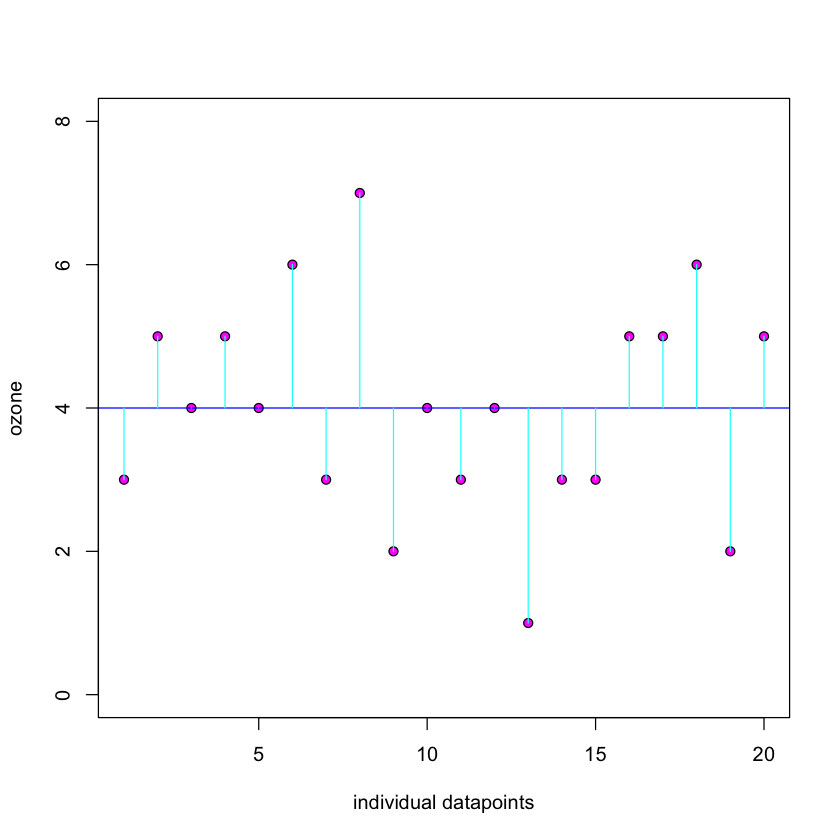

In [24]:
plot(1:20,oneway$ozone,ylim=c(0,8),ylab="ozone",xlab="individual datapoints",pch=21,bg="magenta")
abline(h=mean(oneway$ozone),col="blue")
for(i in 1:20) lines(c(i,i),c(mean(oneway$ozone),oneway$ozone[i]),col="cyan")


What if your explanatory variable is categorical?  Think about the situation where you measure some quantitative response variable on different groups and want to know how group membership affects the response variable. These groups could be treatments (drug, no drug) or plots (fertilized, watered, shaded, etc.) or whatever.  We want to know what effect each treatment has.  We express those as deviations from the mean.  In the plot above, the overall mean is the blue line and the deviations are marked in cyan.

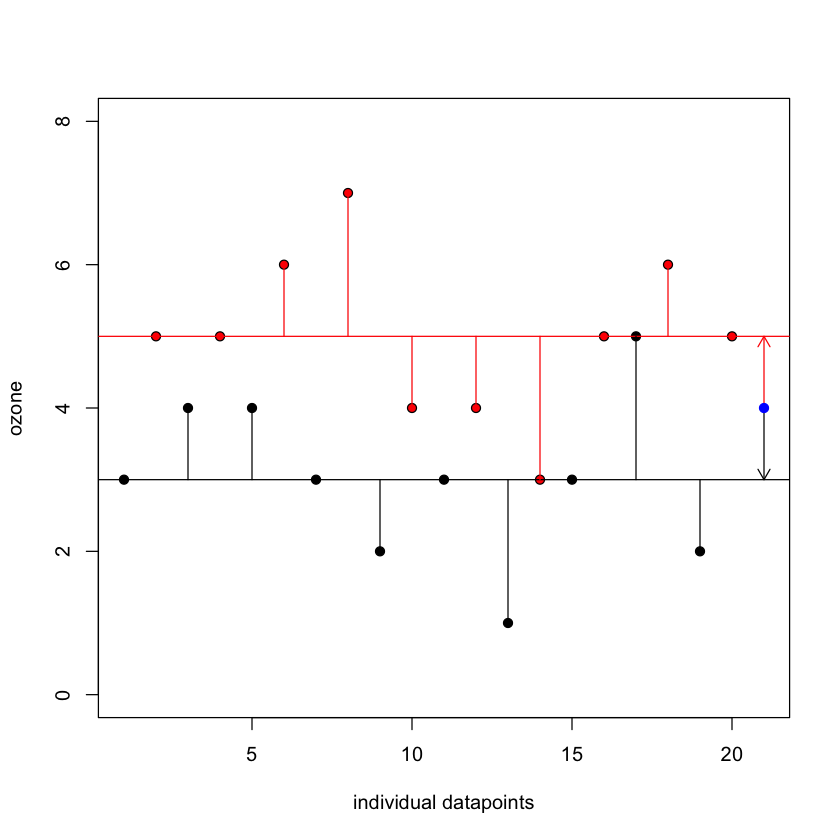

In [35]:
plot(1:20,oneway$ozone,ylim=c(0,8),xlim=c(1,21),ylab="ozone",xlab="individual datapoints",
     pch=21,bg=as.numeric(oneway$garden))
## 5f ##
abline(h=mean(oneway$ozone[oneway$garden=="A"]))
abline(h=mean(oneway$ozone[oneway$garden=="B"]),col="red")
index <- 1:length(oneway$ozone)
for (i in 1:length(index)){
  if (oneway$garden[i] == "A" )
    lines(c(index[i],index[i]),c(mean(oneway$ozone[oneway$garden=="A"]),oneway$ozone[i]))
  else 
    lines(c(index[i],index[i]),c(mean(oneway$ozone[oneway$garden=="B"]),oneway$ozone[i]), col="red")
}

arrows(21,mean(oneway$ozone),21,mean(oneway$ozone[oneway$garden=="A"]),col="black",length=.1)
      arrows(21,mean(oneway$ozone),21,mean(oneway$ozone[oneway$garden=="B"]),col="red",length=.1)
      points(21,mean(oneway$ozone),pch=19,col="blue")

The red line in the plot is the mean ozone for the red group (B). The black line is the mean ozone for the black group. Notice that the residuals are smaller.  By breaking the data apart into groups, we have reduced the unexplained variation in ozone levels.  The arrows show the deviations of the group means from the overall means and represent the effect of being in the red or black group.

In [36]:
summary(aov(ozone~garden,data=oneway))

            Df Sum Sq Mean Sq F value  Pr(>F)   
garden       1     20  20.000      15 0.00111 **
Residuals   18     24   1.333                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(End of Section 4. [Return to top.](#Table-of-Contents))

* * *

## 5. ANCOVA

In [38]:
ancdata<-read.csv('shinyexample/ipomopsis.csv')
ancdata

Warning message:
In file(file, "rt"): cannot open file 'shinyexample/ipomopsis.csv': No such file or directory

ERROR: Error in file(file, "rt"): cannot open the connection


,Root,Fruit,Grazing
1,6.225,59.77,Ungrazed
2,6.487,60.98,Ungrazed
3,4.919,14.73,Ungrazed
4,5.13,19.28,Ungrazed
5,5.417,34.25,Ungrazed
6,5.359,35.53,Ungrazed
7,7.614,87.73,Ungrazed
8,6.352,63.21,Ungrazed
9,4.975,24.25,Ungrazed
10,6.93,64.34,Ungrazed


Plot the data

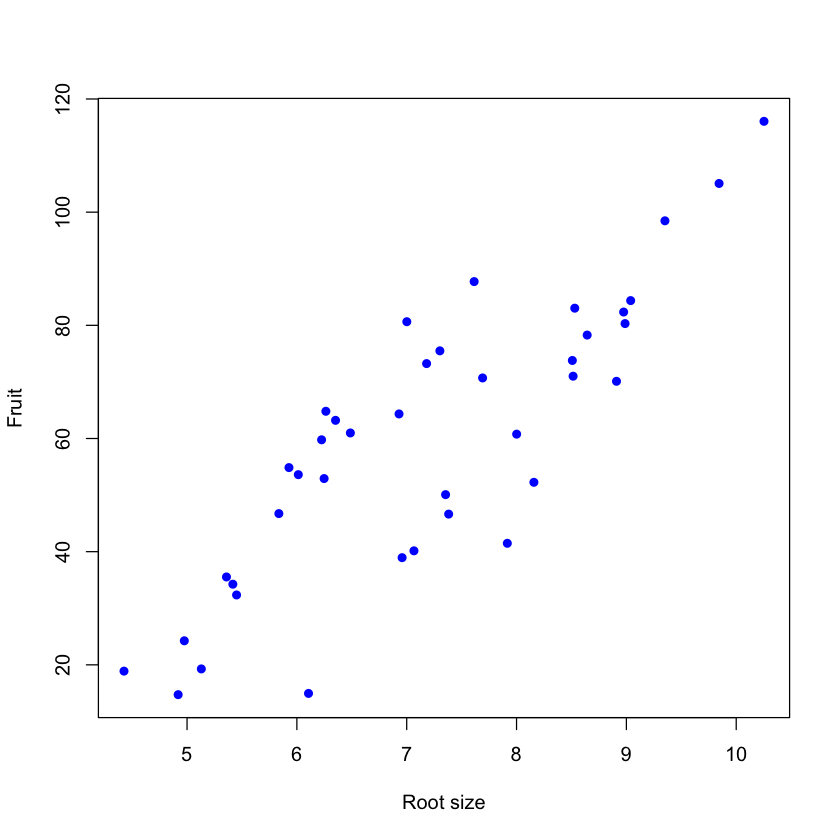

In [39]:
plot(ancdata$Root,ancdata$Fruit,pch=16,col="blue",xlab='Root size',ylab='Fruit')

If you look at the data, you see that there is another variable.  In fact, there are two explanatory variables (one quantitative, one categorical) and one response variable (quantitative) in this example.

Another view of the data

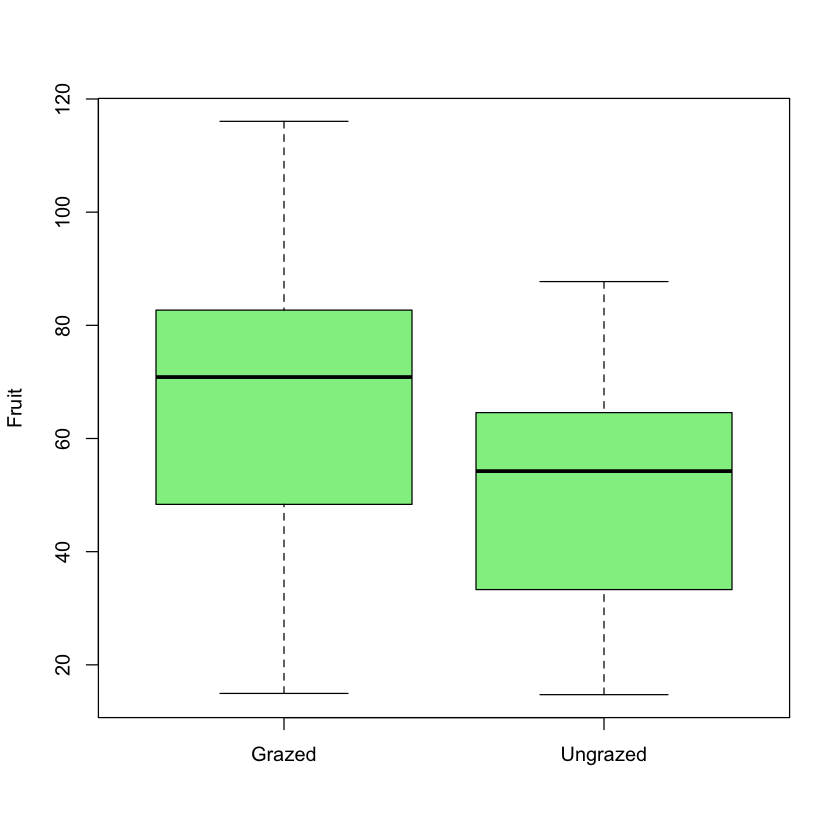

In [40]:
plot(ancdata$Grazing,ancdata$Fruit,col="lightgreen",ylab="Fruit")


From this plot (which does not include root size) it looks like grazing increases fruit yield.

Model:  fruit depends on grazing status:

In [42]:
justGrazingModel=lm(Fruit~Grazing,data=ancdata)
summary(justGrazingModel)


Call:
lm(formula = Fruit ~ Grazing, data = ancdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.991 -18.028   2.915  14.050  48.110 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       67.941      5.236  12.976 1.54e-15 ***
GrazingUngrazed  -17.060      7.404  -2.304   0.0268 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.41 on 38 degrees of freedom
Multiple R-squared:  0.1226,	Adjusted R-squared:  0.09949 
F-statistic: 5.309 on 1 and 38 DF,  p-value: 0.02678


What about root size?
<br/>
In this model, fruit size depends on both root size and grazing group and the effect of root size on fruit size could differ between grazing groups.

In [ ]:
fullmodel <- lm(Fruit~Root*Grazing,data=ancdata)

In [ ]:
summary.aov(fullmodel)

In [ ]:
AIC(justGrazingModel,fullmodel)

Model without interaction<br/>
In this model, fruit size depends on both root size and grazing group <u>but</u> the effect of root size on fruit size is the same regardless of grazing group.

In [ ]:
noInteractionModel=lm(Fruit~Grazing+Root,data=ancdata)


In [ ]:
anova(noInteractionModel,fullmodel)

In [ ]:
plot(ancdata$Root,ancdata$Fruit,pch=21,bg=(4*as.numeric(ancdata$Grazing)))
legend("topleft",c("grazed","ungrazed"),col=c(4,8),pch=16)
abline(-127.829,23.56,col="blue")
abline(-127.829+36.103,23.56,col="blue")

(End of Section 5. End of Module 2. [Return to top.](#Table-of-Contents))

* * *